## Server Resource Usage Prediction Using DTMC
##### Author: Gelar Pambudi A./23221048

## Overview
Predicting resource (CPU and memory) usage using simple DTMC (Discrete Time Markov Chain)
### Workflow
- Dataset cleaning & Labeling
- Calculate transition state matrix
- Predict

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cpu_usage_df = pd.read_csv('dataset/cpu-usage.csv')
memory_usage_df = pd.read_csv('dataset/memory-usage.csv')

<AxesSubplot:xlabel='Time'>

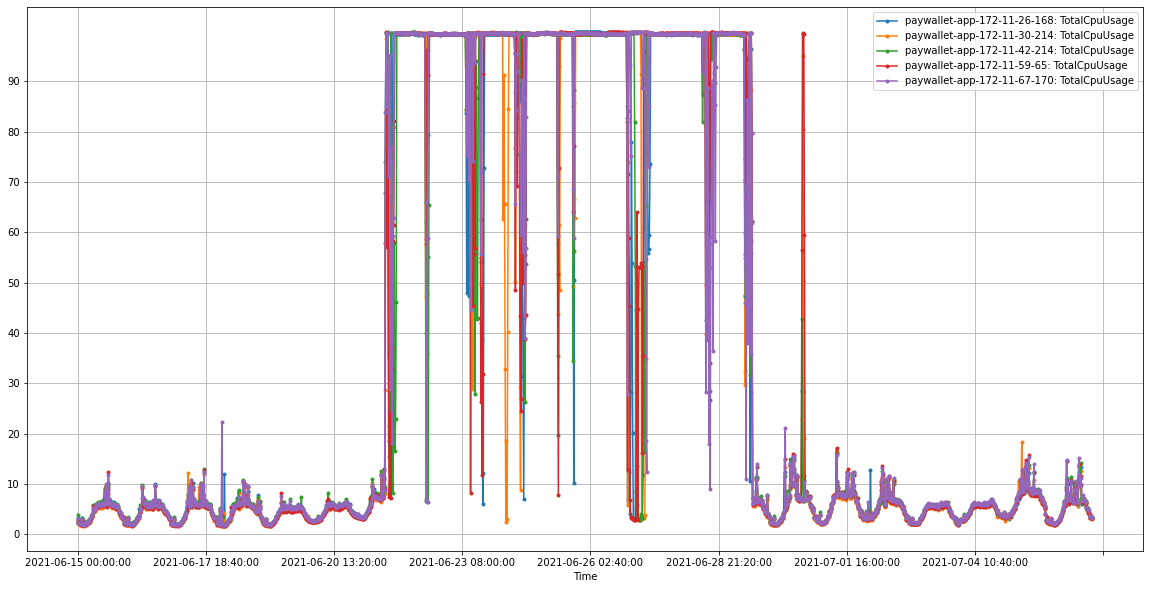

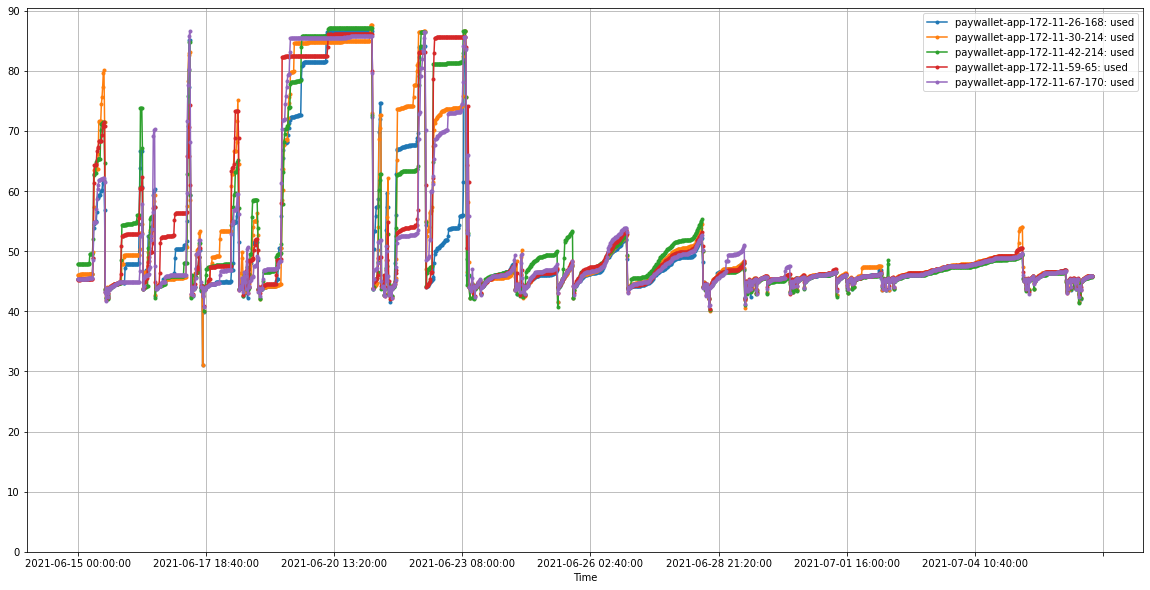

In [3]:
#visualize cpu usage
cpu_usage_df.plot(x='Time',
                  yticks=np.arange(0,100,10),
                  figsize=(20,10),
                  grid=True,
                  style='.-')

#visualize memory usage
memory_usage_df.plot(x='Time', 
                     yticks=np.arange(0,100,10),
                     figsize=(20,10),
                     grid=True,
                     style='.-')

In [4]:
server_usage_df = pd.merge(cpu_usage_df, memory_usage_df, how='left', on=["Time"])

### Define Markov Chain State

| State | Cpu Usage | Memory Usage|
|---|---|---|
| A  | < 70%  | < 70%  |
| B |  < 70% |  >= 70% |
| C  | >= 70%  | < 70%  |
| D  | >= 70%  | >= 70%  |

Resource Threshold

In [10]:
cpu_threshold = 70.0
memory_threshold = 70.0

Server Name Convention (based on its IP address)

In [5]:
server_name = [ 'paywallet-app-172-11-26-168',
                'paywallet-app-172-11-30-214',
                'paywallet-app-172-11-42-214',
                'paywallet-app-172-11-59-65',
                'paywallet-app-172-11-67-170'
              ]

#test naming
print('{}: TotalCpuUsage'.format(server_name[4]))
print('{}: usage'.format(server_name[4]))
server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[4]), '{}: used'.format(server_name[4])]].tail()

paywallet-app-172-11-67-170: TotalCpuUsage
paywallet-app-172-11-67-170: usage


,Time,paywallet-app-172-11-67-170: TotalCpuUsage,paywallet-app-172-11-67-170: used
1579,2021-07-06 22:20:00,3.66,45.8
1580,2021-07-06 22:40:00,3.49,45.8
1581,2021-07-06 23:00:00,3.68,45.8
1582,2021-07-06 23:20:00,3.34,45.8
1583,2021-07-06 23:40:00,3.32,45.8


In [6]:
server1_usage_df = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[0]), '{}: used'.format(server_name[0])]]
server2_usage_df = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[1]), '{}: used'.format(server_name[1])]]
server3_usage_df = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[2]), '{}: used'.format(server_name[2])]]
server4_usage_df = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[3]), '{}: used'.format(server_name[3])]]
server5_usage_df = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[4]), '{}: used'.format(server_name[4])]]

In [7]:
print('Choose the server you want to predict')
print('''
    [1]: paywallet-app-172-11-26-168
    [2]: paywallet-app-172-11-30-214
    [3]: paywallet-app-172-11-42-214
    [4]: paywallet-app-172-11-59-65
    [5]: paywallet-app-172-11-67-170
    ''')
server = input()

Choose the server you want to predict

    [1]: paywallet-app-172-11-26-168
    [2]: paywallet-app-172-11-30-214
    [3]: paywallet-app-172-11-42-214
    [4]: paywallet-app-172-11-59-65
    [5]: paywallet-app-172-11-67-170
    


 3


Labeling the data

In [11]:
server_data = ''
srvname = ''
if server == '1':
    server_data = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[0]), '{}: used'.format(server_name[0])]]
    srvname = server_name[0]
elif server == '2':
    server_data = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[1]), '{}: used'.format(server_name[1])]]
    srvname = server_name[1]
elif server == '3':
    server_data = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[2]), '{}: used'.format(server_name[2])]]
    srvname = server_name[2]
elif server == '4':
    server_data = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[3]), '{}: used'.format(server_name[3])]]
    srvname = server_name[3]
elif server == '5':
    server_data = server_usage_df[['Time', '{}: TotalCpuUsage'.format(server_name[4]), '{}: used'.format(server_name[4])]]
    srvname = server_name[4]

conditions = [
    (server_data['{}: TotalCpuUsage'.format(srvname)] < cpu_threshold) & (server_data['{}: used'.format(srvname)] < memory_threshold),
    (server_data['{}: TotalCpuUsage'.format(srvname)] < cpu_threshold) & (server_data['{}: used'.format(srvname)] >= memory_threshold),
    (server_data['{}: TotalCpuUsage'.format(srvname)] >= cpu_threshold) & (server_data['{}: used'.format(srvname)] < memory_threshold),
    (server_data['{}: TotalCpuUsage'.format(srvname)] >= cpu_threshold) & (server_data['{}: used'.format(srvname)] >= memory_threshold)
]

state = ['A','B','C','D']

server_data['State'] = np.select(conditions, state)

<ipython-input-11-4d097c813a45>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_data['State'] = np.select(conditions, state)


Count state occurence

In [12]:
state_occurence = server_data['State'].value_counts()
state_occurence

A    917
C    454
B    150
D     63
Name: State, dtype: int64

Calculate state transition matrix

In [13]:
server_state = pd.DataFrame()
server_state = server_data[['State']]
server_state['Shifted'] = server_state['State'].shift(-1)
server_state['Count'] = 1

<ipython-input-13-b0848c81a3e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_state['Shifted'] = server_state['State'].shift(-1)
<ipython-input-13-b0848c81a3e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  server_state['Count'] = 1


In [14]:
transition_matrix = server_state.groupby(['State', 'Shifted']).count().unstack().fillna(0)
transition_matrix = transition_matrix.divide(transition_matrix.sum(axis=1), axis=0)
transition_matrix

Count                              
Shifted         A         B         C         D
State                                          
A        0.977074  0.004367  0.018559  0.000000
B        0.026667  0.973333  0.000000  0.000000
C        0.035242  0.000000  0.960352  0.004405
D        0.015873  0.000000  0.015873  0.968254

### Calculate Probability of State

`get_prob(state, m, h, d)`

`get_prob()` function will predict the state of the server in the next m minutes, h hours, and d days

    - argument:
        - state: Array of state. Each element represents the server state. The array element is arranged in following order [A,B,C,D]
        - m: minutes
        - h: hours
        - d: days
    - return value: array of state probability

In [15]:
def get_prob(state, m, h, d):
    n = (m + (h*60) + (d*24*60))//20
    return state.dot(np.linalg.matrix_power(transition_matrix.values, n))

In [16]:
#predict state in next 8 Hours 30 Minutes when initial state is D
initial_state = [0,0,0,1]
get_prob(np.array(initial_state), m=30, h=8, d=0)

array([0.30484436, 0.01439313, 0.22313291, 0.45762959])

In [17]:
#predict state in next 2 Hours 30 minutes for each initial state A, B, C, D
initial_state = [0,0,0,0]
for x in range(0,len(initial_state)):
    initial_state[x] = 1
    print(get_prob(np.array(initial_state), m=30, h=2, d=0))
    initial_state[x] = 0

[0.86425792 0.02639872 0.10787753 0.00146583]
[1.61208166e-01 8.29773303e-01 8.95100667e-03 6.75249648e-05]
[0.20610639 0.00279287 0.76620669 0.02489405]
[0.10454318 0.00134626 0.09497926 0.7991313 ]


In [18]:
#predict state in next 7 Hours 30 minutes for each initial state
initial_state = [0,0,0,0]
for x in range(0,len(initial_state)):
    initial_state[x] = 1
    print(get_prob(np.array(initial_state), m=30, h=7, d=0))
    initial_state[x] = 0

[0.70580021 0.05983824 0.22407953 0.01028202]
[0.36541218 0.56824642 0.06443667 0.00190472]
[0.43430699 0.02030409 0.49753456 0.04785436]
[0.27777469 0.01163737 0.20947553 0.5011124 ]


In [19]:
#predict state in next 2 days for each initial state
initial_state = [0,0,0,0]
for x in range(0,len(initial_state)):
    initial_state[x] = 1
    print(get_prob(np.array(initial_state), m=0, h=0, d=2))
    initial_state[x] = 0

[0.57930912 0.09443182 0.28707595 0.0391831 ]
[0.57666365 0.11007169 0.27792991 0.03533474]
[0.57865165 0.09137432 0.28876771 0.04120632]
[0.57373724 0.08739301 0.28965713 0.04921263]


In [20]:
#predict steady state prob for each initial state
initial_state = [0,0,0,0]
for x in range(0,len(initial_state)):
    initial_state[x] = 1
    print(get_prob(np.array(initial_state), m=0, h=0, d=1000))
    initial_state[x] = 0

[0.57864814 0.09475679 0.28679722 0.03979785]
[0.57864814 0.09475679 0.28679722 0.03979785]
[0.57864814 0.09475679 0.28679722 0.03979785]
[0.57864814 0.09475679 0.28679722 0.03979785]
